In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os,sys
import pylab as plt
%matplotlib inline

import glob


In [2]:
src_dir = '../src'
sys.path.append(src_dir)
from jsd import jsdalpha

In [3]:
src_meta = '../../gutenberg/src/'
sys.path.append(src_meta)
from metaquery import meta_query


In [4]:
# Load meta data

In [5]:
meta=meta_query(path=src_meta+'../metadata/metadata.csv')

# Time

In [6]:
t1 = 1800
t2 = 2000
dt = 20
list_bins_t = list_bins_t = np.arange(t1,t2+dt,dt)
n_bins = len(list_bins_t)
list_books = []

lang = 'en'
for i_bin in range(n_bins-1):
    t1_filter = list_bins_t[i_bin]
    t2_filter = list_bins_t[i_bin+1]
    meta.reset()
    meta.filter_lang(lang,how='only')
    meta.filter_year([t1_filter,t2_filter])
#         meta.filter_year(t)

    books_tmp = meta.get_ids()
    list_books += [books_tmp]

In [7]:
[len(h) for h in list_books]

[2332, 5799, 10894, 16876, 23019, 20442, 14683, 7584, 2520, 995]

In [8]:
list_bins_t

array([1800, 1820, 1840, 1860, 1880, 1900, 1920, 1940, 1960, 1980, 2000])

# t1 vs t2

In [9]:
alpha = 1.
Npair = 1000
weights = False ## standard 1/2,1.2
normalized = True ## 0<=divergence <=1

path_read = '../../gutenberg/data/counts/'


T=len(list_books)
arr_jsd = np.zeros((T,T,Npair))

for i_t1 in range(T):
    for i_t2 in range(T):
        print(i_t1,i_t2)
        if i_t1<=i_t2:
            books_tmp1=list_books[i_t1]
            books_tmp2=list_books[i_t2]
            for i_Npair in range(Npair):

                book_sel = True
                while book_sel== True:

                    pg1 = np.random.choice(books_tmp1)#,replace=False,size=1)
                    pg2 = np.random.choice(books_tmp2)#,replace=False,size=1)
                    fname_read = '%s_counts.txt'%(pg1)
                    filename1 = os.path.join(path_read,fname_read)

                    fname_read = '%s_counts.txt'%(pg2)
                    filename2 = os.path.join(path_read,fname_read)

                    if os.path.isfile(filename1) and os.path.isfile(filename2):
                        book_sel = False
                jsd = jsdalpha(filename1,filename2,alpha=alpha,weights=weights,normalized=normalized)
                arr_jsd[i_t1,i_t2,i_Npair] = jsd
        else:
            arr_jsd[i_t1,i_t2,i_Npair] = np.nan


0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9


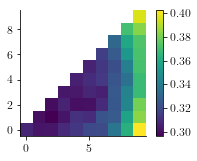

In [13]:
Z = np.mean(arr_jsd,axis=2)
plt.imshow(Z,origin='lower')
plt.colorbar()

In [34]:
###########
## Setup ##
###########
# number of pt for column in latex-document
fig_width_pt = 246  # single-column:510, double-column: 246; Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.1/72.27 # Convert pt to inches
width_vs_height = (np.sqrt(5)-1.0)/2.0 # Ratio of height/width [(np.sqrt(5)-1.0)/2.0]
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = width_vs_height*fig_width  # height in inches
fig_size = [fig_width,fig_height]

# here you can set the parameters of the plot (fontsizes,...) in pt
params = {'backend': 'ps',
          'axes.titlesize':16,
          'axes.labelsize': 14,
          'text.fontsize': 12,
          'legend.fontsize': 6,
#           'figtext.fontsize': 12,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          
          'text.usetex': True,
          'ps.usedistiller' : 'xpdf',
          'figure.figsize': fig_size,
          'text.latex.unicode':True,
          'text.latex.preamble': [r'\usepackage{bm}'],
          
          'xtick.direction':'out',
          'ytick.direction':'out',
          
          'axes.spines.right' : False,
          'axes.spines.top' : False
         }
plt.rcParams.update(params)

/home/martin/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


[1810 1830 1850 1870 1890 1910 1930 1950 1970 1990]


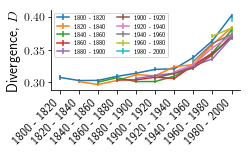

In [35]:
f=plt.figure()
ax=f.add_subplot(1,1,1)

list_t =  (0.5*(list_bins_t[1:] + list_bins_t[:-1])).astype('int') 
print(list_t)
list_labels = [ '%s - %s'%(list_bins_t[i],list_bins_t[i+1]) for i in range(n_bins-1)]

for i_t1 in range(T):
    t1 = list_t[i_t1]
    x = list_t#-t1
    z = arr_jsd[i_t1,:,:]
    y_mu = np.mean(z,axis=1)

    y_err = np.std(z,axis=1)/np.sqrt(Npair)
    ax.errorbar(x,y_mu,yerr=y_err,label=list_labels[i_t1])
    
ax.set_xticks(list_t)
ax.set_xticklabels(list_labels,rotation=45,ha='right')
# ax.set_xlabel(r'$Time t$')
ax.set_ylabel(r'Divergence, $D$')

plt.subplots_adjust(left=0.2,bottom=0.4)

plt.legend(ncol=2,loc = 'upper left')#loc=(1.1,0.3))  

path_save = os.path.join(os.pardir,'figures')
fname_save = 'divergence_time.pdf'
filename = os.path.join(path_save,fname_save)
plt.savefig(filename)